# Auto encoder **AE**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
import time as time

## Load MNIST

In [100]:
train_df = pd.read_csv('../data/mnist_train.csv')
test_df = pd.read_csv('../data/mnist_test.csv')

In [101]:
data = train_df.iloc[:, 1:].values
labels = train_df.iloc[:, 0].values

In [102]:
type(data)

numpy.ndarray

In [103]:
dataT = torch.tensor(data, dtype=torch.float32)
labelsT = torch.tensor(labels, dtype=torch.long)

In [106]:
train_dataset = TensorDataset(dataT, labelsT)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [9]:
train_dataset.tensors[0].shape , train_dataset.tensors[1].shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [10]:
test_data = test_df.iloc[:, 1:].values  
test_labels = test_df.iloc[:, 0].values
test_dataset = TensorDataset(torch.tensor(test_data, dtype=torch.float32), torch.tensor(test_labels, dtype=torch.long))
test_loader = DataLoader(test_dataset, batch_size=test_labels.shape[0], shuffle=True)

## Create the model

In [47]:
def createMNISTAutoEncoder():

    class MNIST_Autoencoder(nn.Module):
        def __init__(self):
            super(MNIST_Autoencoder, self).__init__()
            self.input = nn.Linear(784, 250)
            self.enc = nn.Linear(250, 50)
            self.lat = nn.Linear(50, 250)
            self.dec = nn.Linear(250, 784)

        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.enc(x))
            x = F.relu(self.lat(x))
            x = F.sigmoid(self.dec(x))
            return x    

    net = MNIST_Autoencoder()

    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

    return net, loss_fn, optimizer

In [48]:
net , loss_fn, optimizer = createMNISTAutoEncoder()

In [49]:
X = dataT[:5, :]
y_hat = net(X)
y_hat.shape

torch.Size([5, 784])

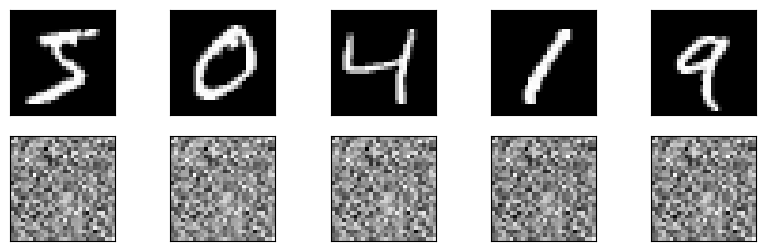

In [50]:
# See what the model did
fig,axs = plt.subplots(2, 5,figsize=(10,3))
for i in range(5):
    axs[0, i].imshow(X[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(y_hat[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

plt.show()    


## Training

In [51]:
def function2TrainModel(net, loss_fn, optimizer, train_loader, epochs=100):
    losses = torch.zeros(epochs)
    for epoch in range(epochs):
        for X,y in train_loader:
            y_hat = net(X)
            loss = loss_fn(y_hat, X)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses[epoch] = loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {losses[epoch]}')
    return losses,net

In [73]:
lossses, net = function2TrainModel(net, loss_fn, optimizer, train_loader, epochs=1000)

Epoch 1/1000, Loss: 0.005821915343403816
Epoch 2/1000, Loss: 0.005326762329787016
Epoch 3/1000, Loss: 0.005322436802089214
Epoch 4/1000, Loss: 0.007043356075882912
Epoch 5/1000, Loss: 0.0052258772775530815
Epoch 6/1000, Loss: 0.004742309916764498
Epoch 7/1000, Loss: 0.00592455081641674
Epoch 8/1000, Loss: 0.004928306210786104
Epoch 9/1000, Loss: 0.005630104336887598
Epoch 10/1000, Loss: 0.005739771761000156
Epoch 11/1000, Loss: 0.004877254832535982
Epoch 12/1000, Loss: 0.0047860946506261826
Epoch 13/1000, Loss: 0.0041732387617230415
Epoch 14/1000, Loss: 0.005345391575247049
Epoch 15/1000, Loss: 0.005339052062481642
Epoch 16/1000, Loss: 0.005033000838011503
Epoch 17/1000, Loss: 0.004299649503082037
Epoch 18/1000, Loss: 0.004495376721024513
Epoch 19/1000, Loss: 0.0052547515369951725
Epoch 20/1000, Loss: 0.004770494066178799
Epoch 21/1000, Loss: 0.004879928193986416
Epoch 22/1000, Loss: 0.005039260257035494
Epoch 23/1000, Loss: 0.005236493889242411
Epoch 24/1000, Loss: 0.00564407370984554

tensor([[5.6587e-01, 2.8344e-01, 4.6322e-02,  ..., 2.7677e-01, 5.8366e-02,
         3.2255e-01],
        [5.3880e-01, 9.9006e-01, 8.1237e-01,  ..., 9.3285e-01, 4.3747e-01,
         7.1932e-01],
        [4.1118e-01, 1.7471e-01, 4.4153e-01,  ..., 6.6749e-01, 1.9688e-01,
         1.3891e-01],
        ...,
        [2.6438e-01, 1.8656e-01, 9.0905e-01,  ..., 7.1347e-01, 6.3224e-02,
         1.2174e-01],
        [3.8047e-01, 5.6892e-01, 1.6065e-01,  ..., 4.1853e-01, 7.8766e-01,
         4.5826e-01],
        [6.6161e-01, 2.7037e-01, 5.8180e-04,  ..., 3.7867e-01, 4.5008e-01,
         2.2181e-01]])


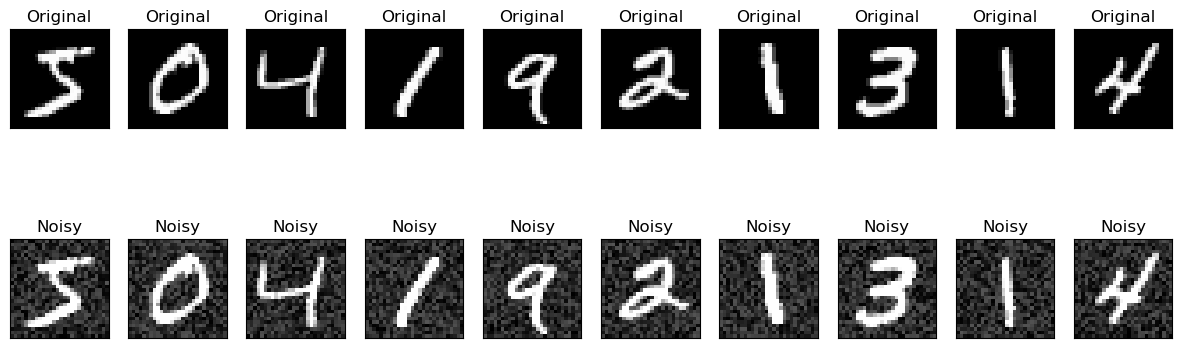

In [106]:
X = dataT[:10, :]
# add noise 
X_noise = X + torch.rand_like(X)/3

print(torch.rand_like(X))
# clip at 1 
X_noise[X_noise > 1] = 1

# show noisy images

fig,axs = plt.subplots(2, 10,figsize=(15,5))

for i in range(10):
    axs[0, i].imshow(X[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(X_noise[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

for i in range(10):
    axs[0, i].set_title('Original')
    axs[1, i].set_title('Noisy')

plt.show()  

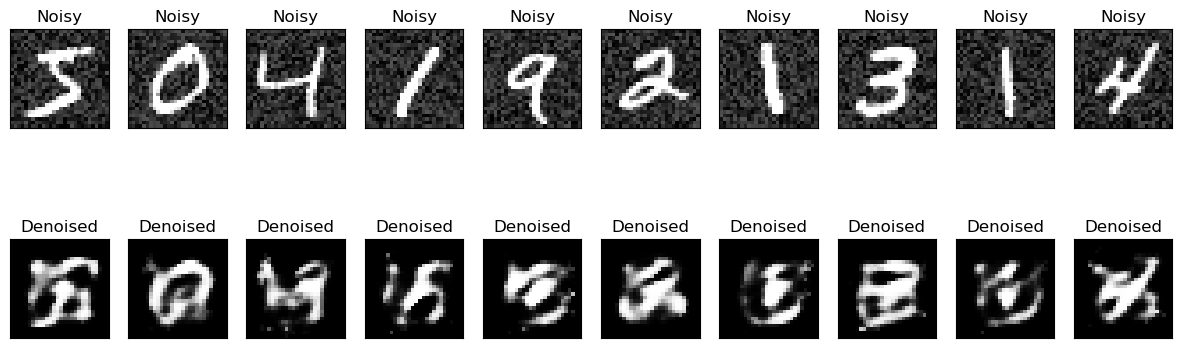

In [107]:
Y_hat = net(X_noise)
fig,axs = plt.subplots(2, 10,figsize=(15,5))
for i in range(10):
    axs[0, i].imshow(X_noise[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(Y_hat[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

for i in range(10):
    axs[0, i].set_title('Noisy')
    axs[1, i].set_title('Denoised')

plt.show()

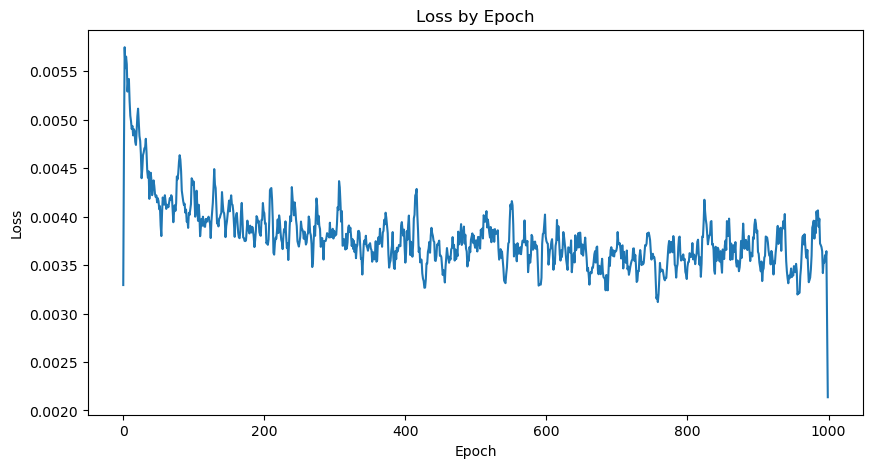

In [117]:
def smooth(x, k=5):
    return np.convolve(x, np.ones(k) / k, mode='same')


plt.figure(figsize=(10, 5))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(smooth(lossses, 5))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')
plt.show()

## Variational Autoencoder (VAE)

 -  A VAE, or Variational Autoencoder, is a type of generative model in machine learning that combines ideas from deep
 learning (specifically neural networks) with Bayesian inference. It’s designed to learn latent (hidden) representations of data in an unsupervised manner and can generate new data samples.
 
 In traditional autoencoders, inputs are mapped deterministically to a latent vector $z=e(x)$ while in variational 
 autoencoders, inputs are mapped to a probability distribution over latent vectors, and a latent vector is then sampled
 from that distribution. The decoder becomes more robust at decoding latent vectors as a result.
 
 ![vae](./assets/vae.png)


 - In other word traditional auto-encoder lacks the ability to generate new data or model uncertainty in the latent space because is  maps an input $x$ to a fixed latent representation $z$ while VAE samples $z$ from the distribution $N(μ(x), σ²(x)).$

 - **Derivation problem** : 

     - $\theta$: are the encoder weights

     - $w$ : are the decoder weights
     
     - $p(x|z,w)$ is the model output 

     ![vae](./assets/vae_book.png)

     - When we backpropgate first through the decoder there is no problem, but when we arrive to the laten space we find out that the gradient with respect to $\theta$ is problematic since $z$ is non-differentiable due to randomness so there is no deterministic relationship between $\sigma$ and $\mu$ and z .This is like trying to compute the derivative of a dice roll outcome with respect to the dice’s weight—it’s nonsensical because randomness dominates.
     Here the `reparameterization trick` comes in.

-  **Reparameterization trick**:

  First, note that if $\epsilon$ is a Gaussian random variable with zero mean and unit variance $N(0, 1)$, then the quantity $z=\sigma \epsilon + \mu$ will have a Gaussian distribution, with mean $\mu$ and variance $\sigma ^2$ and we know that $\mu = \mu(x_n,\theta)$ and $\sigma = \sigma (x_n,\theta)$ that are the outputs of the encoder network.

  Now our latent output will be :  $$z =  \mu(x_n,\theta) \epsilon +  \sigma (x_n,\theta) $$

  This makes the dependence on $\theta$ explicit and allows gradients with respect to $\theta $ to be evaluated.

  ![vae_param](./assets/vae_params.png)
 

# Create VAE model

In [139]:
class MNIST_VAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=250, latent_dim=20, device='cpu',inspect=False):
        super(MNIST_VAE, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
        )
        self.mean_layer = nn.Linear(hidden_dim, latent_dim)
        self.logvar_layer = nn.Linear(hidden_dim, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

        self.device = device
        self.inspect = inspect

    def encode(self, x):
        x = self.encoder(x)
        mean = self.mean_layer(x)
        logvar = self.logvar_layer(x)
        logvar = torch.clamp(logvar, min=-10, max=10)
        return mean, logvar

    def reparameterization(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        epsilon = torch.randn_like(std).to(self.device)
        return mean + std * epsilon

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mean, logvar = self.encode(x)

        if self.inspect:
            print(f'Input shape: {x.shape}')
            print(f'Mean shape: {mean.shape}')
            print(f'Logvar shape: {logvar.shape}')

        z = self.reparameterization(mean, logvar)

        if self.inspect:
            print(f'Z shape: {z.shape}')

        x_hat = self.decode(z)

        if self.inspect:
            print(f'Output shape: {x_hat.shape}')


        return x_hat, mean, logvar

In [140]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device

device(type='mps')

In [112]:
model = MNIST_VAE(device=device,inspect=True).to(device)

In [113]:
sample_data = next(iter(train_loader))
sample_data[0].shape, sample_data[1].shape

(torch.Size([64, 784]), torch.Size([64]))

In [114]:
y_hat =  model(sample_data[0].to(device))

Input shape: torch.Size([64, 784])
Mean shape: torch.Size([64, 50])
Logvar shape: torch.Size([64, 50])
Z shape: torch.Size([64, 50])
Output shape: torch.Size([64, 784])


In [141]:
model = MNIST_VAE(device=device).to(device)

In [142]:
def loss_function(x, x_hat, mean, logvar, beta=1.0):
    # Reconstruction loss
    recon_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum') / x.size(0)

    # KL divergence
    kl_loss = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp()) / x.size(0)

    return recon_loss + beta * kl_loss

In [144]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [145]:
num_epochs = 1000

In [146]:
losses = []
kl_warmup = 50
for epoch in range(num_epochs):

    for x, _ in train_loader:
        x = x.to(device)
        x_hat, mean, log_var = model(x)
        beta = min(1.0, epoch / kl_warmup)
        loss = loss_function(x,x_hat, mean, log_var,beta=beta)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    print(f'Epoch [{epoch}/{num_epochs}] Loss: {losses[epoch]:.4f}')


Epoch [0/1000] Loss: 549.6063
Epoch [1/1000] Loss: 535.5225
Epoch [2/1000] Loss: 521.3994
Epoch [3/1000] Loss: 507.3798
Epoch [4/1000] Loss: 493.0764
Epoch [5/1000] Loss: 473.4192
Epoch [6/1000] Loss: 446.9468
Epoch [7/1000] Loss: 415.7902
Epoch [8/1000] Loss: 388.8711
Epoch [9/1000] Loss: 356.0099
Epoch [10/1000] Loss: 320.6318
Epoch [11/1000] Loss: 298.4124
Epoch [12/1000] Loss: 288.6375
Epoch [13/1000] Loss: 273.8141
Epoch [14/1000] Loss: 284.3153
Epoch [15/1000] Loss: 251.1448
Epoch [16/1000] Loss: 261.5023
Epoch [17/1000] Loss: 249.6787
Epoch [18/1000] Loss: 248.9934
Epoch [19/1000] Loss: 233.1339
Epoch [20/1000] Loss: 224.1956
Epoch [21/1000] Loss: 243.8337
Epoch [22/1000] Loss: 232.4013
Epoch [23/1000] Loss: 221.0303
Epoch [24/1000] Loss: 218.6188
Epoch [25/1000] Loss: 232.7127
Epoch [26/1000] Loss: 215.8149
Epoch [27/1000] Loss: 218.1880
Epoch [28/1000] Loss: 221.7594
Epoch [29/1000] Loss: 228.9473
Epoch [30/1000] Loss: 219.9358
Epoch [31/1000] Loss: 223.7142
Epoch [32/1000] Lo

KeyboardInterrupt: 

In [147]:
torch.save(model.state_dict(), "../data/models/mnist_vae.pth")

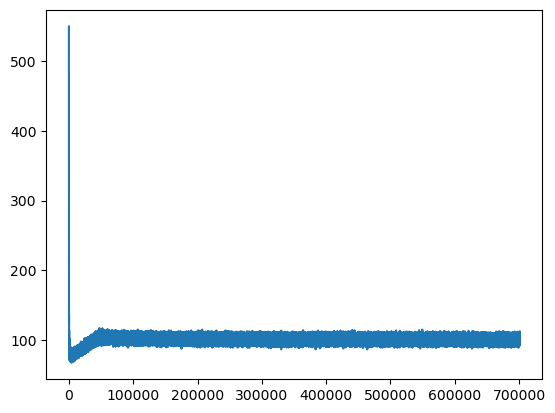

In [174]:
plt.plot(losses)

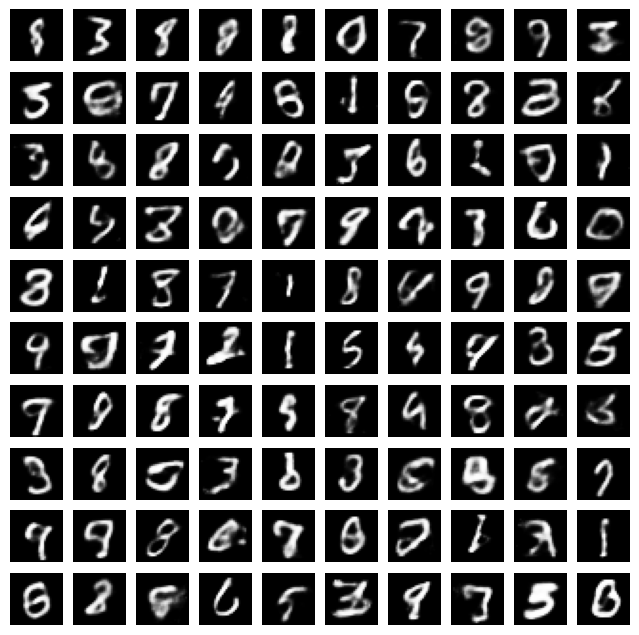

In [168]:
model.eval()
with torch.no_grad():
    z = torch.randn(100, 20).to(device)
    samples = model.decode(z)           # (64, 784)
    samples = samples.view(-1, 28, 28) # reshape all images

fig, axes = plt.subplots(10,10, figsize=(8,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(samples[i].cpu(), cmap='gray')
    ax.axis('off')
plt.show()

# CVAE

In [177]:
class MNIST_CVAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=250, latent_dim=20, n_classes=10, device='cpu', inspect=False):
        super(MNIST_CVAE, self).__init__()
        self.device = device
        self.inspect = inspect
        self.latent_dim = latent_dim
        self.n_classes = n_classes
        
        # Encoder: input is image + label
        self.encoder = nn.Sequential(
            nn.Linear(input_dim + n_classes, hidden_dim),
            nn.LeakyReLU(0.2),
        )
        self.mean_layer = nn.Linear(hidden_dim, latent_dim)
        self.logvar_layer = nn.Linear(hidden_dim, latent_dim)

        # Decoder: input is z + label
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + n_classes, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def encode(self, x, y):
        # concatenate input image x with one-hot label y
        x = torch.cat([x, y], dim=1)
        x = self.encoder(x)
        mean = self.mean_layer(x)
        logvar = self.logvar_layer(x)
        logvar = torch.clamp(logvar, min=-10, max=10)
        return mean, logvar

    def reparameterization(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        epsilon = torch.randn_like(std).to(self.device)
        return mean + std * epsilon

    def decode(self, z, y):
        # concatenate latent vector z with one-hot label y
        z = torch.cat([z, y], dim=1)
        return self.decoder(z)

    def forward(self, x, y):
        mean, logvar = self.encode(x, y)
        z = self.reparameterization(mean, logvar)
        x_hat = self.decode(z, y)
        return x_hat, mean, logvar

In [178]:
n_classes = 10
cvae = MNIST_CVAE(input_dim=784, hidden_dim=250, latent_dim=20, n_classes=n_classes, device=device)
cvae.to(device)

MNIST_CVAE(
  (encoder): Sequential(
    (0): Linear(in_features=794, out_features=250, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (mean_layer): Linear(in_features=250, out_features=20, bias=True)
  (logvar_layer): Linear(in_features=250, out_features=20, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=30, out_features=250, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=250, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [179]:
cvae_state = cvae.state_dict()
vae_state = model.state_dict()

for name, param in vae_state.items():
    if name in cvae_state and param.shape == cvae_state[name].shape:
        cvae_state[name] = param

cvae.load_state_dict(cvae_state)

<All keys matched successfully>

In [194]:
optimizer = torch.optim.Adam(cvae.parameters(), lr=1e-4)
cvae_losses = []
num_epochs = 100
best_model = None
best_loss = float('inf')

In [195]:
for epoch in range(num_epochs):
    for x, labels in train_loader:
        batch_losses = []
        x = x.to(device)
        # Convert labels to one-hot
        y = F.one_hot(labels, num_classes=n_classes).float().to(device)

        x_hat, mean, logvar = cvae(x, y)
        loss = loss_function(x, x_hat, mean, logvar, beta=1.0)

        batch_losses.append(loss.item())



        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epch_loss = np.mean(batch_losses)
    cvae_losses.append(epch_loss)
    if epch_loss < best_loss:
        best_model = cvae.state_dict()
        best_loss = loss      
        print('New best model saved!')

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epch_loss}')

New best model saved!
Epoch 1/100, Loss: 100.80628967285156
Epoch 2/100, Loss: 102.39234924316406
New best model saved!
Epoch 3/100, Loss: 99.52960968017578
Epoch 4/100, Loss: 101.42510986328125
Epoch 5/100, Loss: 103.39208221435547
New best model saved!
Epoch 6/100, Loss: 95.67864990234375
Epoch 7/100, Loss: 95.74269104003906
New best model saved!
Epoch 8/100, Loss: 90.69879150390625
Epoch 9/100, Loss: 95.7007064819336
Epoch 10/100, Loss: 104.60317993164062
Epoch 11/100, Loss: 103.72358703613281
New best model saved!
Epoch 12/100, Loss: 88.6005630493164
Epoch 13/100, Loss: 102.26616668701172
Epoch 14/100, Loss: 99.86197662353516
Epoch 15/100, Loss: 93.78944396972656
Epoch 16/100, Loss: 101.01174926757812
Epoch 17/100, Loss: 101.02076721191406
Epoch 18/100, Loss: 103.88984680175781
Epoch 19/100, Loss: 95.19778442382812
Epoch 20/100, Loss: 94.43513488769531
Epoch 21/100, Loss: 93.54501342773438
Epoch 22/100, Loss: 105.23458862304688
Epoch 23/100, Loss: 99.13722229003906
Epoch 24/100, Lo

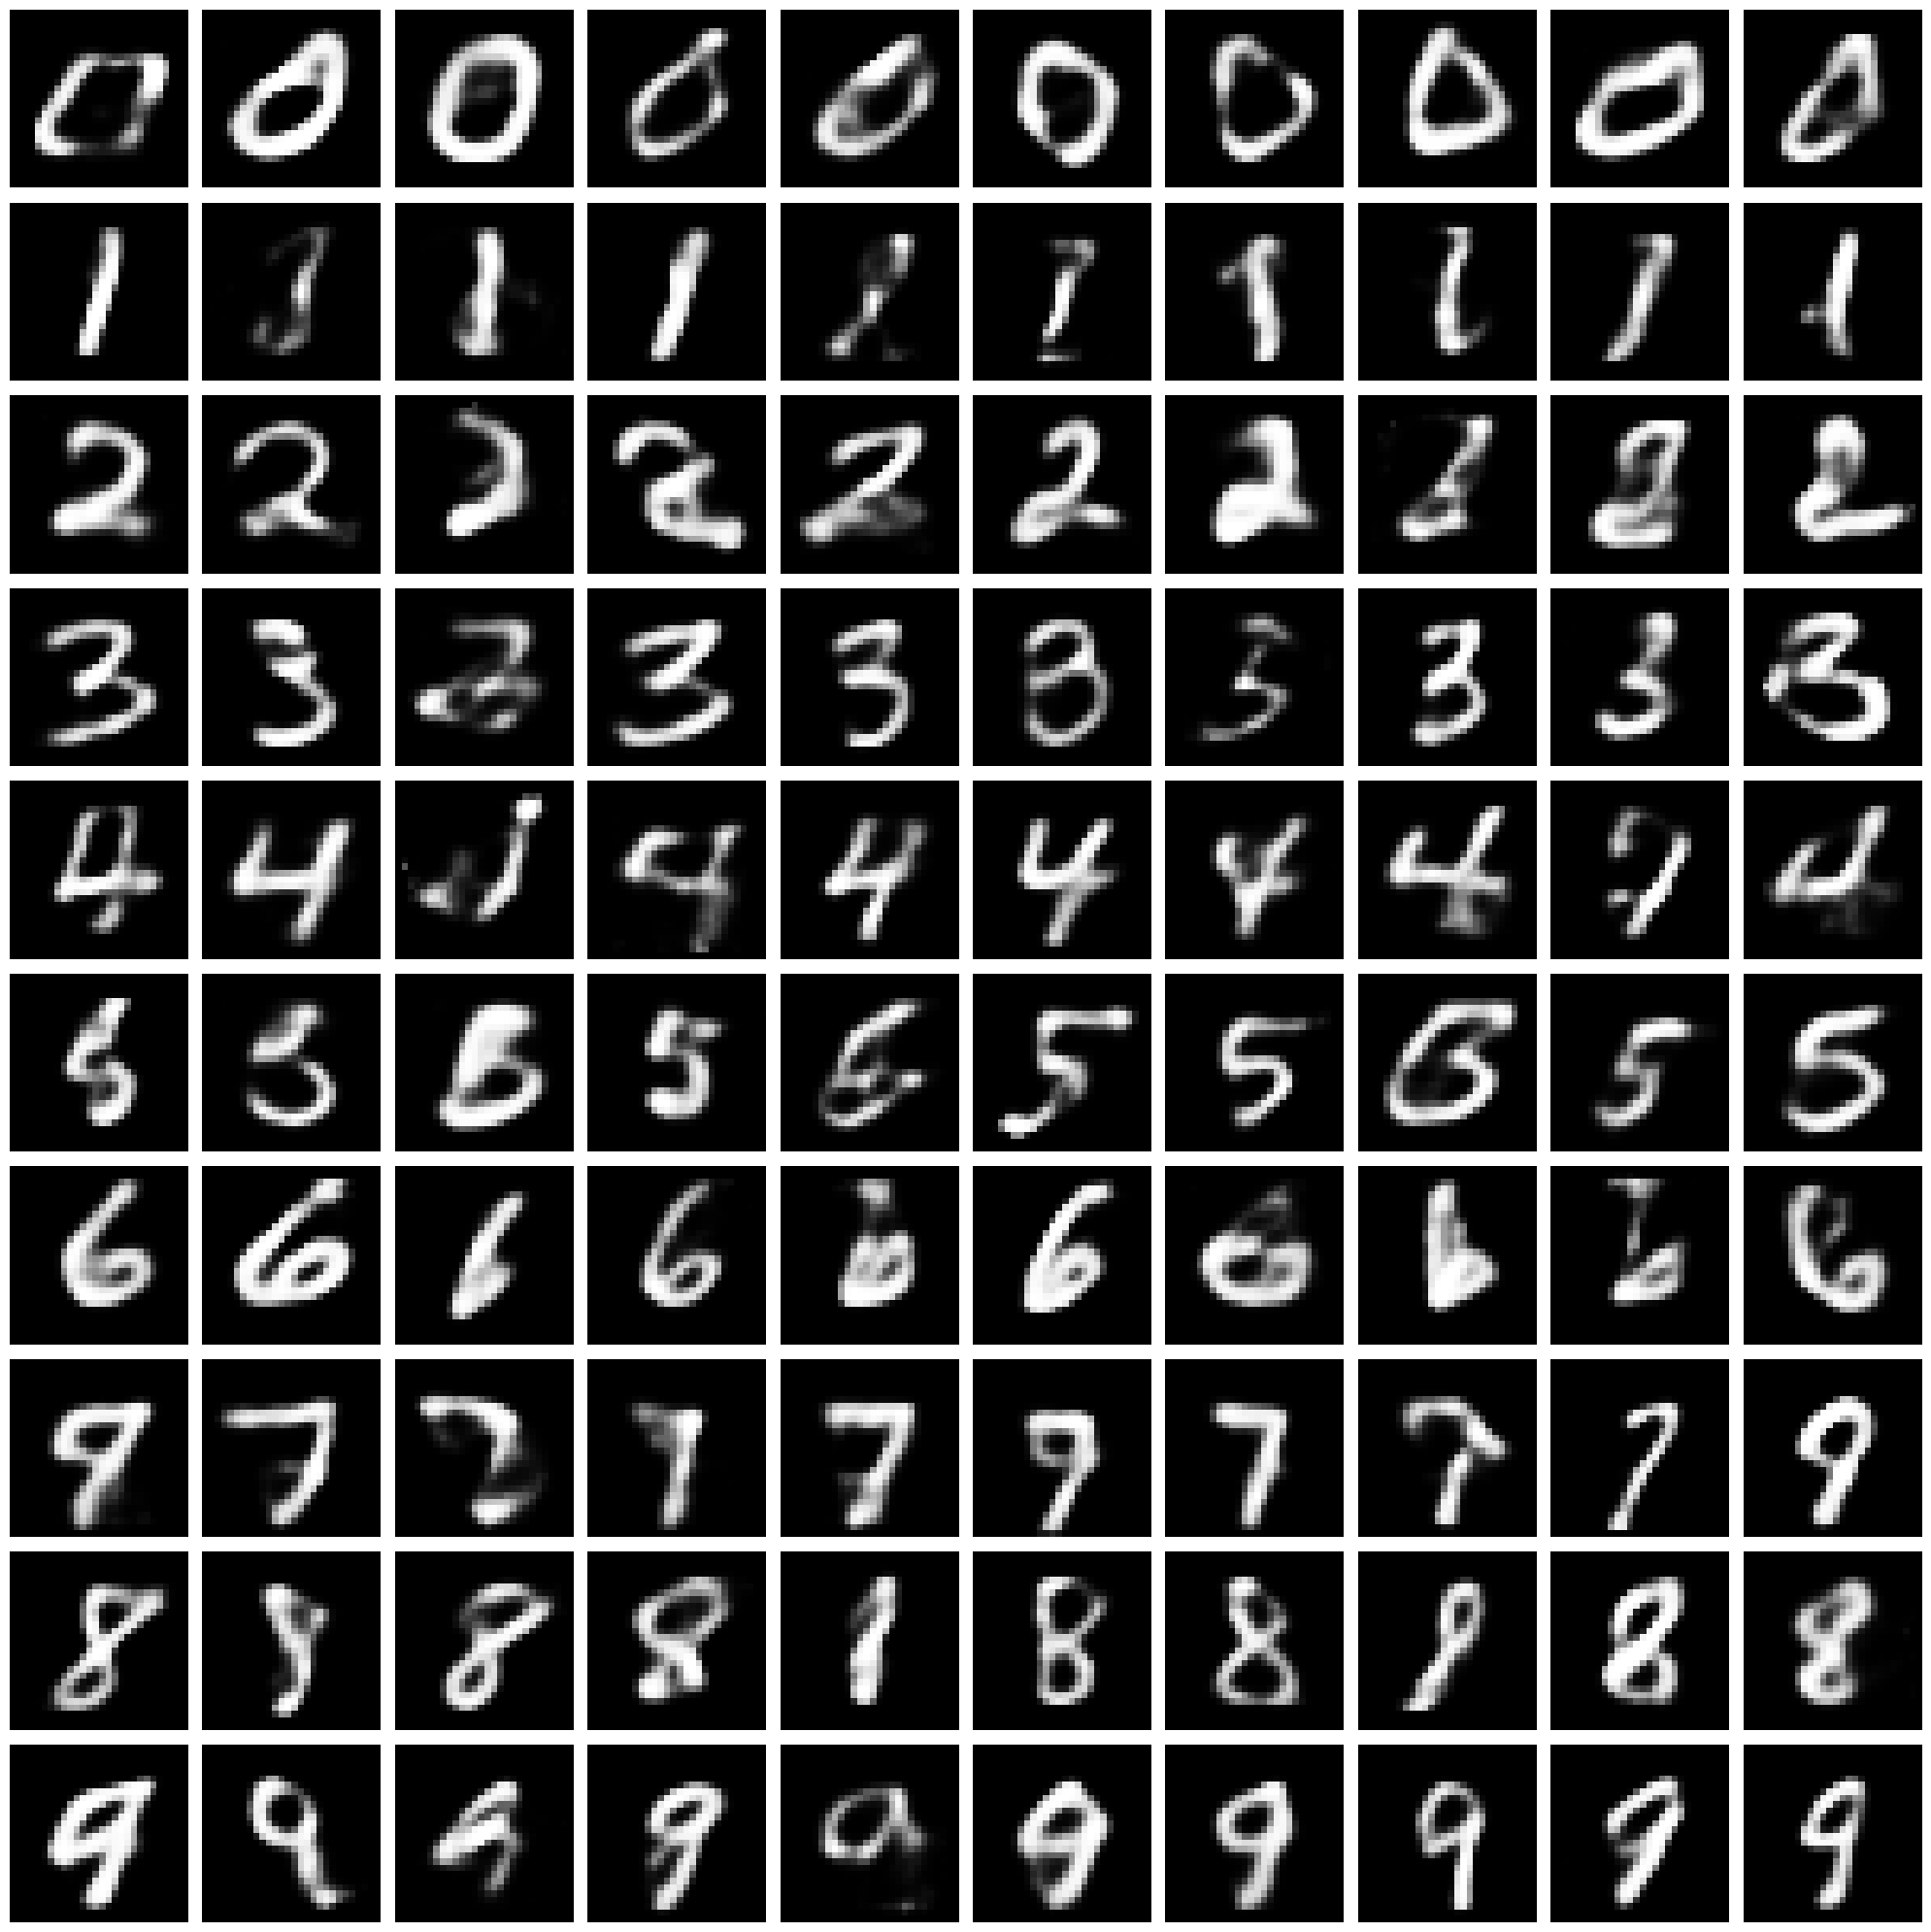

In [196]:
cvae.load_state_dict(best_model)

cvae.eval()

n_classes = cvae.n_classes
samples_per_class = 10
latent_dim = cvae.latent_dim

with torch.no_grad():
    all_samples = []

    for class_idx in range(n_classes):
        # repeat label `samples_per_class` times
        y = torch.zeros(samples_per_class, n_classes).to(cvae.device)
        y[:, class_idx] = 1.0

        # sample multiple z vectors
        z = torch.randn(samples_per_class, latent_dim).to(cvae.device)

        # decode
        x_hat = cvae.decode(z, y)           # (samples_per_class, 784)
        x_hat = x_hat.view(-1, 28, 28)
        all_samples.append(x_hat)

    # stack all samples: (n_classes*samples_per_class, 28, 28)
    all_samples = torch.vstack(all_samples)

# plot in grid
fig, axes = plt.subplots(n_classes, samples_per_class, figsize=(samples_per_class*2, n_classes*2))
for i in range(n_classes):
    for j in range(samples_per_class):
        ax = axes[i, j]
        ax.imshow(all_samples[i*samples_per_class + j].cpu(), cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()